['setosa' 'versicolor' 'virginica']


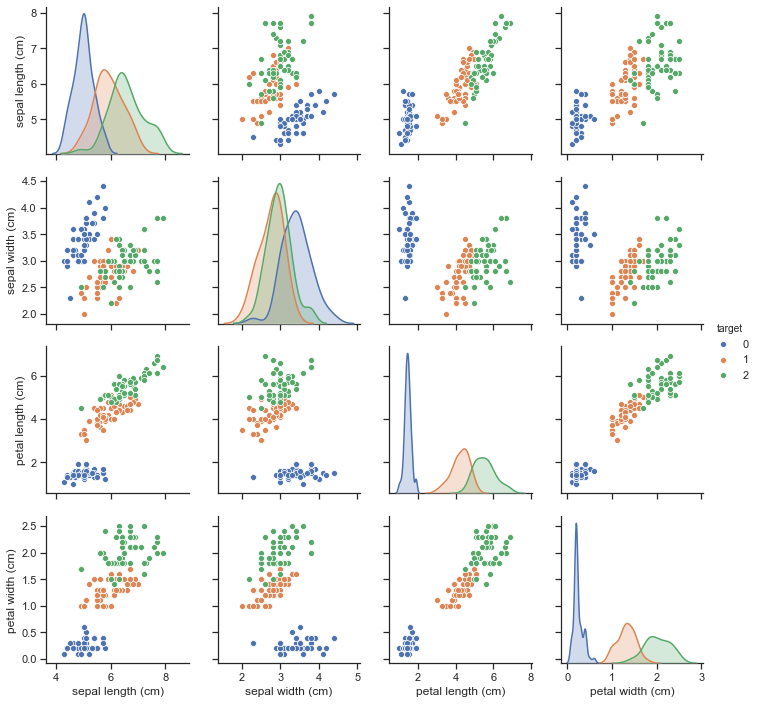

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

data = datasets.load_iris()
#join data and target in a single pandas dataframe
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

import seaborn as sns; sns.set(style="ticks")
#create a pairplot excluding the target column which will be used to assign colors to datapoints
sns.pairplot(df, vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], hue="target")

print(data['target_names'])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
#split data 60% 20% 20% for this the second split should get 25% since it is taken from only 80%
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Use the train set and test the model on the test set. Store the accuracy of the model.
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:' + str(accuracy) + ' %.')

Accuracy:96.66666666666667 %.


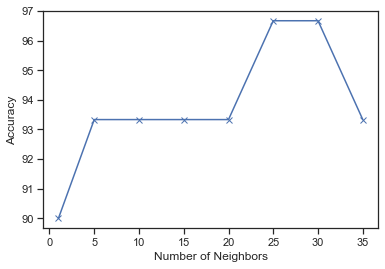

In [5]:
ks = [1, 5, 10, 15, 20, 25, 30, 35]
accuracies = []

# for every k given train the model with the train set then test the model with the validation set.
for k in ks:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)*100
    #store the accuracy for this k
    accuracies.append(accuracy)
    
plt.figure()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.plot(ks, accuracies, marker ='x')
plt.show()

The k i will be choosing is 25 since it is the lowest number of neighbors with the best accuracy. This will reduce computation time since there are less distances between neighbors to compute.

In [6]:
#Train the model using the train set and test the model on the test set.
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:' + str(accuracy) + ' %.')

Accuracy:100.0 %.


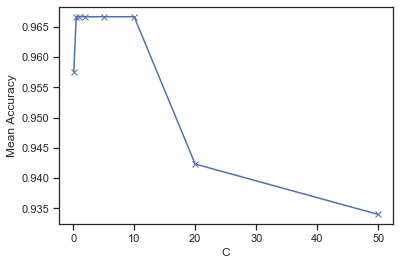

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)

cs = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
scores = []
# for every c given compute a 10 fold cross validation score in the 80% train data to get the accuracies.
for c in cs:
    classifier = SVC(C=c, kernel='linear', random_state = 42)
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    #store the mean of the 10 scores
    scores.append(cross_val_scores.mean())

plt.figure()
plt.xlabel('Cost')
plt.ylabel('Mean Accuracy')
plt.plot(cs, scores, marker ='x')
plt.show() 

To get the best result on test data is better to have the largest margin possible with a good accuracy so as to not overfit the data, a large margin is given by a low cost, so the best parameter should be .5 since it is the lowest cost with best accuracy.

In [8]:
#Train the model using the train set and test the model on the test set.
classifier = SVC(C=.5, kernel='linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:' + str(accuracy) + ' %.')

Accuracy:100.0 %.


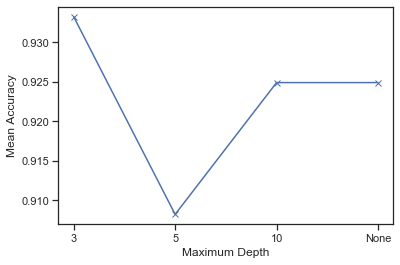

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)

depths = [3, 5, 10, None]
scores = []

# for every depth given compute a 10 fold cross validation score in the 80% train data to get the accuracies.
for dep in depths:
    classifier = DecisionTreeClassifier(max_depth = dep, random_state = 42)
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(cross_val_scores.mean())

plt.figure()
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Accuracy')
plt.plot([3,5,10,'None'], scores, marker ='x')
plt.show()

The best accuracy was given with a depth of 3

In [10]:
#Train the model using the train set and test the model on the test set.
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:' + str(accuracy) + ' %.')

Accuracy:100.0 %.


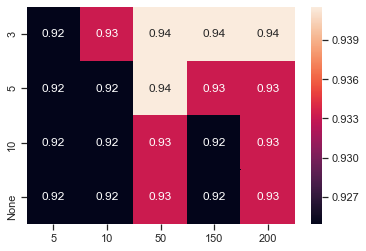

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)

depths = [3, 5, 10, None]
trees = [5, 10, 50, 150, 200]
scoresmatrix = []
# for every depth and number of trees given compute a 10 fold cross validation score in the 80% train data to get the accuracies.
for dep in depths:
    scores = []
    for tree in trees:
        classifier = RandomForestClassifier(n_estimators=tree, max_depth = dep, random_state = 42)
        cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
        scores.append(cross_val_scores.mean())
    scoresmatrix.append(scores)

plt.figure()
sea = sns.heatmap(scoresmatrix, xticklabels= trees, yticklabels=[3,5,10,'None'], annot=True)
bottom, top = sea.get_ylim()
sea.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Having the lowest depth with the less amount of trees gives the shortest computation time so I chose 3 with 50 trees.

In [13]:
#Train the model using the train set and test the model on the test set.
classifier = RandomForestClassifier(n_estimators=50, max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:' + str(accuracy) + ' %.')

Accuracy:100.0 %.


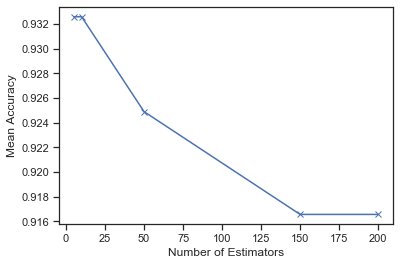

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)

estimators = [5, 10, 50, 150, 200]
scores = []

# for every number of estimators given compute a 10 fold cross validation score in the 80% train data to get the accuracies.
for est in estimators:
    classifier = GradientBoostingClassifier(n_estimators = est, random_state = 42)
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(cross_val_scores.mean())

plt.figure()
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')
plt.plot(estimators, scores, marker ='x')
plt.show()

Lower number of estimators will give a faster computation time so I chose 5.

In [15]:
#Train the model using the train set and test the model on the test set.
classifier = GradientBoostingClassifier(n_estimators=5, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:' + str(accuracy) + ' %.')

Accuracy:100.0 %.


CONCLUSIONS:

1.-The train set is used to fit the classifier by knowing the outputs that the data has with specific values on each feature. Train sets are used to find the best parameters to use with the model. The test set is used to verify that our model can predict the outputs, so the model doesnt know the outputs of the test set when predicting. 

2.-The validation set is used to find the best hyperparameters while the test set is used to measure the accuracy of the model, the test set shouldnt be used until the model is ready.

3.-The accuracy droped when using a K above 30, because taking more than 30 closest neighbors in such a small dataset is probably taking too many points from a different class and you end up missclassifying.

4.-Increasing the depth lowered the accuracy, it was overfitting the data by having more complex trees which in this case didnt help since the number of features is small. You cannot make too many different decisions when having only 4 features.

5.-Increasing the number of estimators in gradient tree boosting didnt help since it overfits the data. Boosting decreases the number of estimators needed when compared to random forests, since every new estimator it adds solves the areas where the previous estimator found more conflict instead of having a completely random tree like random forests do.

6.-C defines the cost of having a missclassified data within the margins of the classifier. A big C makes the classifier have smaller margins making less missclassifications, but this could result in overfitting which is why having a low C with good enough accuracy might be better for this dataset.